# Breast cancer dataset

## Download and import required libraries

In [1]:
!pip3 install scikit-learn
!pip3 install pandas 


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
# Note, for now MinMaxScaler > normalize > StandardScaler > MaxAbsScaler (but not by much)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

## Load the dataset and test the data

In [3]:
dataset = pd.read_csv('./dataset/breast-cancer-diagnostic.shuf.lrn.csv')
test_data = pd.read_csv('./dataset/breast-cancer-diagnostic.shuf.tes.csv')
test_data_class = pd.read_csv('./dataset/breast-cancer-diagnostic.shuf.sol.ex.csv')

# Delete whitespace in column names
dataset.columns = dataset.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

In [4]:
# Check the values were loaded correctly
print(dataset.head())

         ID  class  radiusMean  textureMean  perimeterMean  areaMean  \
0    886452   True       13.96        17.05          91.43     602.4   
1  84348301   True       11.42        20.38          77.58     386.1   
2   9012795   True       21.37        15.10         141.30    1386.0   
3    894326   True       18.22        18.87         118.70    1027.0   
4    867387  False       15.71        13.93         102.00     761.7   

   smoothnessMean  compactnessMean  concavityMean  concavePointsMean  ...  \
0         0.10960          0.12790        0.09789            0.05246  ...   
1         0.14250          0.28390        0.24140            0.10520  ...   
2         0.10010          0.15150        0.19320            0.12550  ...   
3         0.09746          0.11170        0.11300            0.07950  ...   
4         0.09462          0.09462        0.07135            0.05933  ...   

   radiusWorst  textureWorst  perimeterWorst  areaWorst  smoothnessWorst  \
0        16.39         22.07

In [5]:
## Check for missing values
print(dataset.isnull().sum())

ID                        0
class                     0
radiusMean                0
textureMean               0
perimeterMean             0
areaMean                  0
smoothnessMean            0
compactnessMean           0
concavityMean             0
concavePointsMean         0
symmetryMean              0
fractalDimensionMean      0
radiusStdErr              0
textureStdErr             0
perimeterStdErr           0
areaStdErr                0
smoothnessStdErr          0
compactnessStdErr         0
concavityStdErr           0
concavePointsStdErr       0
symmetryStdErr            0
fractalDimensionStdErr    0
radiusWorst               0
textureWorst              0
perimeterWorst            0
areaWorst                 0
smoothnessWorst           0
compactnessWorst          0
concavityWorst            0
concavePointsWorst        0
symmetryWorst             0
fractalDimensionWorst     0
dtype: int64


## Histograms

In [6]:
columns_to_plot = {
    'class': 'Class (Malignant/Benign)',
    'concavePointsWorst': 'Concave Points Worst',
    'concavePointsMean': 'Concave Points Mean',
    'radiusWorst': 'Radius Worst',
    'perimeterWorst': 'Perimeter Worst',
    'areaWorst': 'Area Worst',
    'areaStdErr': 'Area StdErr',
    'concavityWorst': 'Concavity Worst',
    'concavityMean': 'Concavity Mean',
    'perimeterMean': 'Perimeter Mean',
    'areaMean': 'Area Mean',
    'radiusMean': 'Radius Mean',
    'smoothnessWorst': 'Smoothness Worst',
    'perimeterStdErr': 'Perimeter StdErr',
    'textureWorst': 'Texture Worst',
    'symmetryWorst': 'Symmetry Worst',
    'radiusStdErr': 'Radius StdErr',
    'compactnessWorst': 'Compactness Worst',
    'textureMean': 'Texture Mean',
    'compactnessMean': 'Compactness Mean',
    'smoothnessMean': 'Smoothness Mean',
    'concavePointsStdErr': 'Concave Points StdErr',
    'concavityStdErr': 'Concavity StdErr',
    'fractalDimensionWorst': 'Fractal Dimension Worst',
    'fractalDimensionMean': 'Fractal Dimension Mean',
    'textureStdErr': 'Texture StdErr',
    'symmetryStdErr': 'Symmetry StdErr',
    'compactnessStdErr': 'Compactness StdErr',
    'smoothnessStdErr': 'Smoothness StdErr',
    'fractalDimensionStdErr': 'Fractal Dimension StdErr',
    'symmetryMean': 'Symmetry Mean'
}


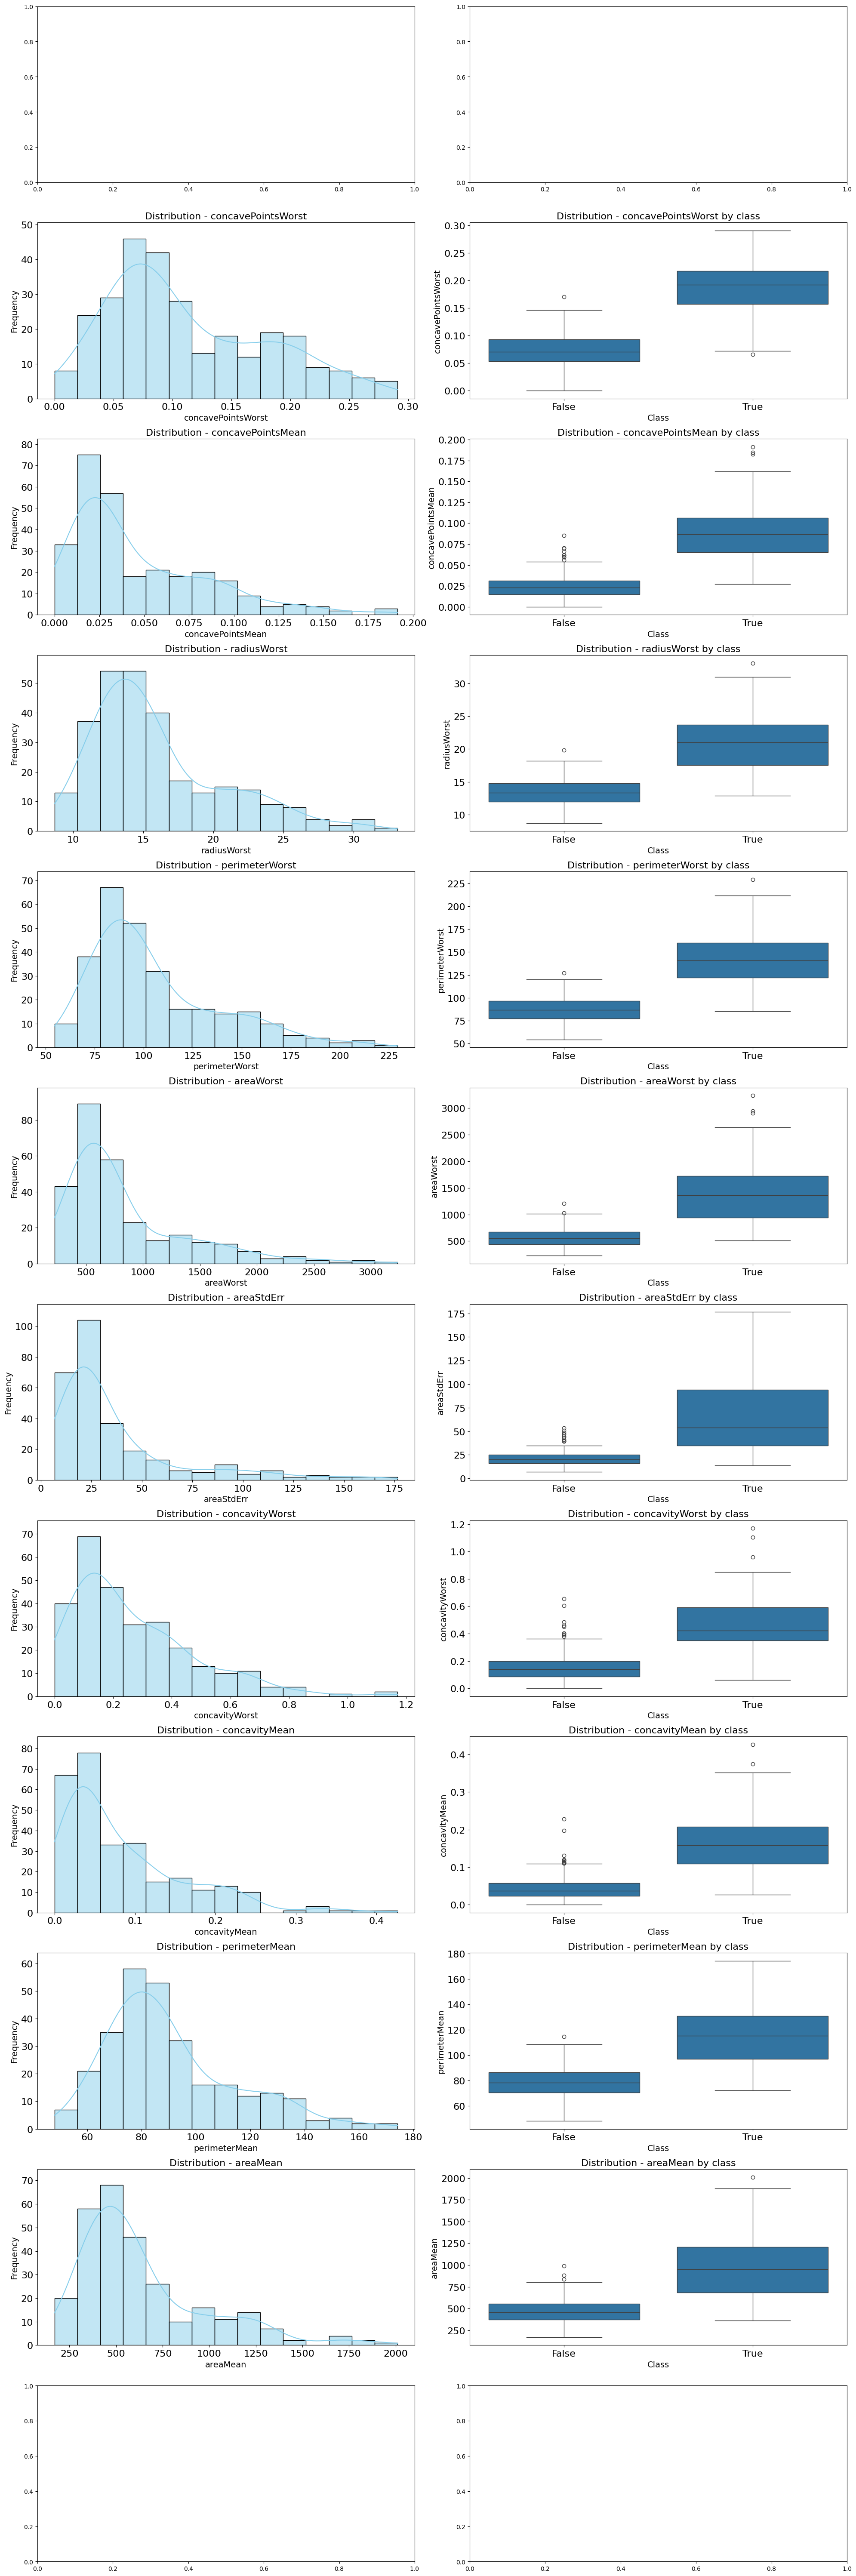

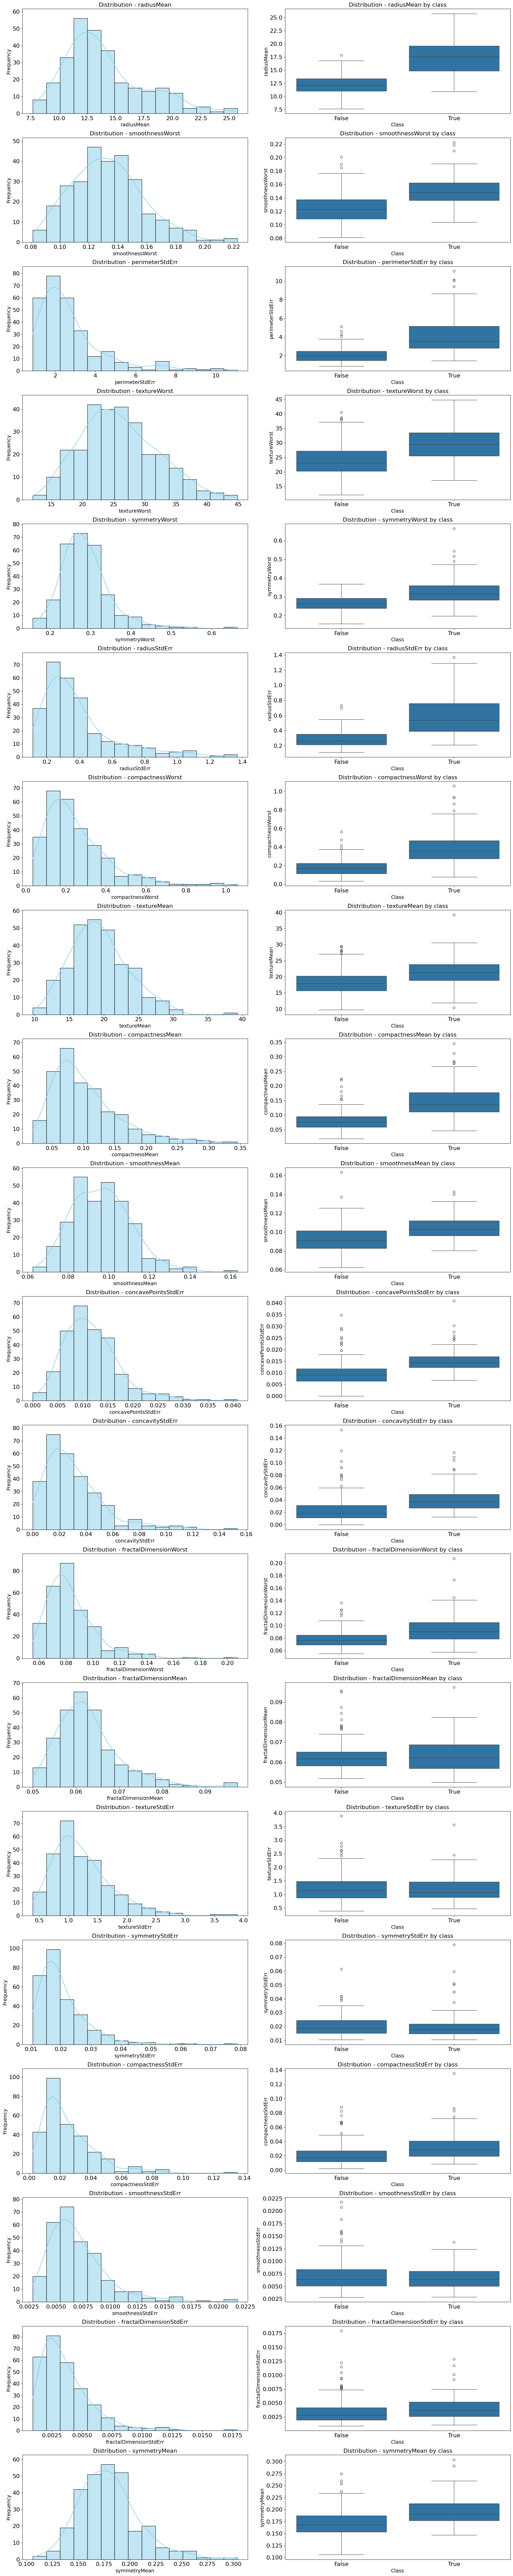

In [7]:
columns_to_plot_list = list(columns_to_plot.keys())
columns_to_plot_1 = columns_to_plot_list[:columns_to_plot_list.index('radiusMean')]
columns_to_plot_2 = columns_to_plot_list[columns_to_plot_list.index('radiusMean'):]

def plot_columns(columns_to_plot, filename):
    charts_per_row = 2
    total_columns = len(columns_to_plot)
    rows = math.ceil(total_columns / charts_per_row)

    fig, axs = plt.subplots(rows * 2, charts_per_row, figsize=(20, rows * 10))  # Multiplicamos las filas por 2 para tener espacio para ambos gráficos

    axs = axs.ravel()

    for i, column in enumerate(columns_to_plot):
        if column != 'class':
            unique_values = dataset[column].dropna().unique()
            unique_count = len(unique_values)
            bis = 15

            if unique_count <= 4:
                bis = unique_count
                axs[i*2].set_xticks(unique_values)

            sns.histplot(dataset[column], kde=True, ax=axs[i*2], color='skyblue', edgecolor='black', bins=bis)
            max_count = max(np.histogram(dataset[column].dropna(), bins=bis)[0])
            axs[i*2].set_ylim(top=max_count * 1.1) 

            axs[i*2].tick_params(axis='y', labelsize=16)
            axs[i*2].tick_params(axis='x', labelsize=16)
            axs[i*2].set_title(f'Distribution - {column}', fontsize=16)
            axs[i*2].set_xlabel(column, fontsize=14)
            axs[i*2].set_ylabel('Frequency', fontsize=14)

            # Boxplot
            sns.boxplot(x='class', y=column, data=dataset, ax=axs[i*2+1])
            axs[i*2+1].tick_params(axis='y', labelsize=16)
            axs[i*2+1].tick_params(axis='x', labelsize=16)
            axs[i*2+1].set_title(f'Distribution - {column} by class', fontsize=16)
            axs[i*2+1].set_xlabel('Class', fontsize=14)
            axs[i*2+1].set_ylabel(column, fontsize=14)

    plt.tight_layout()
    plt.show()
    fig.savefig(filename, dpi=fig.dpi)

plot_columns(columns_to_plot_1, 'plot1.png')
plot_columns(columns_to_plot_2, 'plot2.png')

## Processing

In [8]:
## Remove the ID column from the dataset and test_data
dataset = dataset.drop('ID', axis=1)

In [9]:
## Transform the class to binary values
dataset['class'] = dataset['class'].astype(int)

In [10]:
X = dataset.drop('class', axis=1)
y = dataset['class']

## Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# For MinMaxScaler, MaxAbsScaler and StandardScaler
## Scale the data (standardize)
scaler = MinMaxScaler()


# Fit the scaler to the dataset and transform the dataset
X_train_scaled = X_train.copy()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data, based on the scaler fitted to the training data
X_test_scaled = X_test.copy()
X_test_scaled = scaler.transform(X_test)


# ## For normalization
# # Fit the scaler to the dataset and transform the dataset
# X_attributes_scaled = X_attributes_test.copy()
# X_attributes_scaled = normalize(X_attributes, norm='l2')

# # Scale the test data, based on the scaler fitted to the training data
# X_attributes_test_scaled = X_attributes_test.copy()
# X_attributes_test_scaled = normalize(X_attributes_test, norm='l2')

In [12]:
print(X_train_scaled)

[[0.32701369 0.38526613 0.30843795 ... 0.21268041 0.17350158 0.12759997]
 [0.56871223 0.32076137 0.52327983 ... 0.40721649 0.65378549 0.05008914]
 [0.50717889 0.30137469 0.47719689 ... 0.28989691 0.18947161 0.03828848]
 ...
 [0.28654582 0.08494889 0.27395519 ... 0.39690722 0.16088328 0.25740725]
 [0.39797106 0.32781107 0.37962816 ... 0.34948454 0.15832019 0.0915188 ]
 [0.19452298 0.65068735 0.17741935 ... 0.         0.         0.03260039]]


In [13]:
# Train a Random Forest model to get which Features are more important
model = RandomForestClassifier(max_leaf_nodes=2,
                        max_features=5,
                        max_depth=5,
                        random_state=42)

# Fit the model to the data
model.fit(X_train, y_train)

# Get the most important Features
most_important_attributes = pd.DataFrame(
                            model.feature_importances_,
                            index = X_train.columns,
                            columns=['importance']
                        ).sort_values('importance', ascending=False)

print(most_important_attributes)


## Get a list of the most important Features whose importance is greater than 0.05
most_important_attributes_list_importance_5_percent = most_important_attributes[most_important_attributes['importance'] > 0.05].index.tolist()
most_important_attributes_list_importance_10_percent = most_important_attributes[most_important_attributes['importance'] > 0.1].index.tolist()

print(most_important_attributes_list_importance_5_percent)
print(most_important_attributes_list_importance_10_percent)

                        importance
concavePointsWorst            0.17
areaWorst                     0.14
concavePointsMean             0.11
radiusWorst                   0.09
concavityMean                 0.09
perimeterMean                 0.07
perimeterWorst                0.06
radiusMean                    0.06
areaMean                      0.06
concavityWorst                0.04
compactnessWorst              0.03
compactnessMean               0.02
radiusStdErr                  0.02
areaStdErr                    0.02
symmetryWorst                 0.01
concavityStdErr               0.01
fractalDimensionStdErr        0.00
smoothnessWorst               0.00
textureWorst                  0.00
compactnessStdErr             0.00
symmetryStdErr                0.00
concavePointsStdErr           0.00
textureMean                   0.00
smoothnessStdErr              0.00
perimeterStdErr               0.00
textureStdErr                 0.00
fractalDimensionMean          0.00
symmetryMean        

In [14]:
# Select only the attributes whose importance is greater than 5%
X_train_important_attributes_5p = X_train.copy()
X_train_important_attributes_5p = X_train[most_important_attributes_list_importance_5_percent]

X_test_important_attributes_5p = X_test.copy()
X_test_important_attributes_5p = X_test[most_important_attributes_list_importance_5_percent]

# Select only the attributes whose importance is greater than 10%
X_train_important_attributes_10p = X_train.copy()
X_train_important_attributes_10p = X_train[most_important_attributes_list_importance_10_percent]

X_test_important_attributes_10p = X_test.copy()
X_test_important_attributes_10p = X_test[most_important_attributes_list_importance_10_percent]


# Select only the attributes whose importance is greater than 5% from the scaled data
X_train_scaled_important_attributes_5p = X_train_scaled.copy()
X_test_scaled_important_attributes_5p = X_test_scaled.copy()

X_train_scaled_important_attributes_5p = pd.DataFrame(X_train_scaled_important_attributes_5p, columns=X_train.columns)
X_test_scaled_important_attributes_5p = pd.DataFrame(X_test_scaled_important_attributes_5p, columns=X_test.columns)

X_train_scaled_important_attributes_5p = X_train_scaled_important_attributes_5p[most_important_attributes_list_importance_5_percent]
X_test_scaled_important_attributes_5p = X_test_scaled_important_attributes_5p[most_important_attributes_list_importance_5_percent]


# Select only the attributes whose importance is greater than 10% from the scaled data
X_train_scaled_important_attributes_10p = X_train_scaled.copy()
X_test_scaled_important_attributes_10p = X_test_scaled.copy()

X_train_scaled_important_attributes_10p = pd.DataFrame(X_train_scaled_important_attributes_10p, columns=X_train.columns)
X_test_scaled_important_attributes_10p = pd.DataFrame(X_test_scaled_important_attributes_10p, columns=X_test.columns)

X_train_scaled_important_attributes_10p = X_train_scaled_important_attributes_10p[most_important_attributes_list_importance_10_percent]
X_test_scaled_important_attributes_10p = X_test_scaled_important_attributes_10p[most_important_attributes_list_importance_10_percent]

## Models training and evaluation

In [15]:
## Summary of the variables with the data
# X_train - Attributes of the training data, without the class column
# y_train - Class of the training data

# X_test - Attributes of the test data, without the class column
# y_test - Class of the test data

# X_train_scaled - Attributes of the training data, without the class column, scaled
# X_test_scaled - Attributes of the test data, without the class column, scaled

# X_train_important_attributes_5p - Attributes of the training data, without the class column, with only the most important Features
# X_test_important_attributes_5p - Attributes of the test data, without the class column, with only the most important Features

# X_train_scaled_important_attributes_5p - Attributes of the training data, without the class column, with only the most important Features, scaled
# X_test_scaled_important_attributes_5p - Attributes of the test data, without the class column, with only the most important Features, scaled

In [16]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Validating the model
    Y_predicted = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, Y_predicted)
    f1 = f1_score(y_test, Y_predicted, average='weighted')
    report = classification_report(y_test, Y_predicted, output_dict=True)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']

    # Return metrics
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

In [17]:
def generate_kaggle_report(model, scaled_data = False, file_name = "submission.csv"):
    test_data_competition = test_data.drop('ID', axis=1)
    test_data_competition_scaled = scaler.transform(test_data_competition)
    
    if scaled_data:
        test_data_competition = test_data_competition_scaled

    Y_predicted_competition = model.predict(test_data_competition)

    print(Y_predicted_competition)


    submission = pd.DataFrame({
        "ID": test_data["ID"],
        "class": Y_predicted_competition
    })

    submission['class'] = submission['class'].astype(bool)

    # Save the submission
    submission.to_csv(file_name, index=False)

## 1. KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [19]:
training_classes = y_train
validation_classes = y_test

### Test 1
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: No
- `Features`: All

In [20]:
k = 10
weights = 'distance'
training_attributes = X_train
validation_data = X_test

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)

# Train and validate the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)


{'accuracy': 0.9305555555555556,
 'precision': 0.9468085106382979,
 'recall': 0.9166666666666667,
 'f1_score': 0.9293496765406878}

### Test 2
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: All

In [21]:
k = 10
weights = 'distance'

training_attributes = X_train_scaled
validation_data = X_test_scaled

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)

{'accuracy': 0.9444444444444444,
 'precision': 0.9565217391304348,
 'recall': 0.9333333333333333,
 'f1_score': 0.9437229437229439}

### Test 3
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: No
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [22]:
k = 10
weights = 'uniform'

training_attributes = X_train_important_attributes_5p
validation_data = X_test_important_attributes_5p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)


{'accuracy': 0.9166666666666666,
 'precision': 0.9375,
 'recall': 0.9,
 'f1_score': 0.914814814814815}

### Test 4
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [23]:
k = 10
weights = 'uniform'

training_attributes = X_train_scaled_important_attributes_5p
validation_data = X_test_scaled_important_attributes_5p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.9444444444444444,
 'precision': 0.948051948051948,
 'recall': 0.9380952380952381,
 'f1_score': 0.9441325848703556}

### Test 5
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: No
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [24]:
k = 10
weights = 'uniform'

training_attributes = X_train_important_attributes_10p
validation_data = X_test_important_attributes_10p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)


# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.8888888888888888,
 'precision': 0.90625,
 'recall': 0.8714285714285714,
 'f1_score': 0.8864197530864197}

### Test 6
- `Neighbors`: 10
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [54]:
k = 10
weights = 'uniform'

training_attributes = X_train_scaled_important_attributes_10p
validation_data = X_test_scaled_important_attributes_10p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.9444444444444444,
 'precision': 0.948051948051948,
 'recall': 0.9380952380952381,
 'f1_score': 0.9441325848703556}

### ---- Finding the best K ----

In [26]:
# Finding the best K value
# Creating a list of K values in the range of 1 to 20
def optimal_k(X_train):
    k_values = list(range(1, 100))

    # Creating a list of cross validation scores
    cv_scores = []

    for k in k_values:
        # Creating the KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
        
        # Doing cross validation
        scores = cross_val_score(knn_model, X_train, y_train, cv=12, scoring='accuracy')
        
        # Saving the mean of the scores
        cv_scores.append(np.mean(scores))

    # Finding the optimal K value by finding the one with the highest accuracy
    optimal_k = k_values[np.argmax(cv_scores)]
    print(f"The optimal number of neighbors is: {optimal_k}")
    return optimal_k

### Test 6
- `Neighbors`: 5
- `Weights`: uniform
- `Data normalization`: No
- `Features`: All

In [27]:
print(optimal_k(X_train))

The optimal number of neighbors is: 5
5


In [28]:
k = 5
weights = 'distance'

training_attributes = X_train
validation_data = X_test

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.9444444444444444,
 'precision': 0.948051948051948,
 'recall': 0.9380952380952381,
 'f1_score': 0.9441325848703556}

### Test 7
- `Neighbors`: 19
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: All

In [29]:
print(optimal_k(X_train_scaled))

The optimal number of neighbors is: 19
19


In [30]:
k = 19
weights = 'distance'

training_attributes = X_train_scaled
validation_data = X_test_scaled

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)

# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.9722222222222222,
 'precision': 0.9772727272727273,
 'recall': 0.9666666666666667,
 'f1_score': 0.9720662924351777}

### Test 8
- `Neighbors`: 5
- `Weights`: uniform
- `Data normalization`: No
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterWorst
    - concavityWorst
    - perimeterMean

In [31]:
print(optimal_k(X_train_important_attributes_5p))

The optimal number of neighbors is: 5
5


In [32]:
k = 5
weights = 'uniform'

training_attributes = X_train_important_attributes_5p
validation_data = X_test_important_attributes_5p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.9305555555555556,
 'precision': 0.937037037037037,
 'recall': 0.9214285714285715,
 'f1_score': 0.9299253881831014}

### Test 9
- `Neighbors`: 6
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [33]:
print(optimal_k(X_train_scaled_important_attributes_5p))

The optimal number of neighbors is: 18
18


In [34]:
k = 18
weights = 'uniform'

training_attributes = X_train_scaled_important_attributes_5p
validation_data = X_test_scaled_important_attributes_5p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.9722222222222222,
 'precision': 0.9772727272727273,
 'recall': 0.9666666666666667,
 'f1_score': 0.9720662924351777}

### Test 10
- `Neighbors`: 9
- `Weights`: uniform
- `Data normalization`: No
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [35]:
print(optimal_k(X_train_important_attributes_10p))

The optimal number of neighbors is: 9
9


In [36]:
k = 9
weights = 'uniform'

training_attributes = X_train_important_attributes_10p
validation_data = X_test_important_attributes_10p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.9027777777777778,
 'precision': 0.9074074074074074,
 'recall': 0.8928571428571428,
 'f1_score': 0.9018955434563419}

### Test 11
- `Neighbors`: 9
- `Weights`: uniform
- `Data normalization`: Yes
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [37]:
print(optimal_k(X_train_scaled_important_attributes_10p))

The optimal number of neighbors is: 3
3


In [38]:
k = 3
weights = 'uniform'

training_attributes = X_train_scaled_important_attributes_10p
validation_data = X_test_scaled_important_attributes_10p

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights)
# Training the model
train_and_evaluate(knn_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.9444444444444444,
 'precision': 0.948051948051948,
 'recall': 0.9380952380952381,
 'f1_score': 0.9441325848703556}

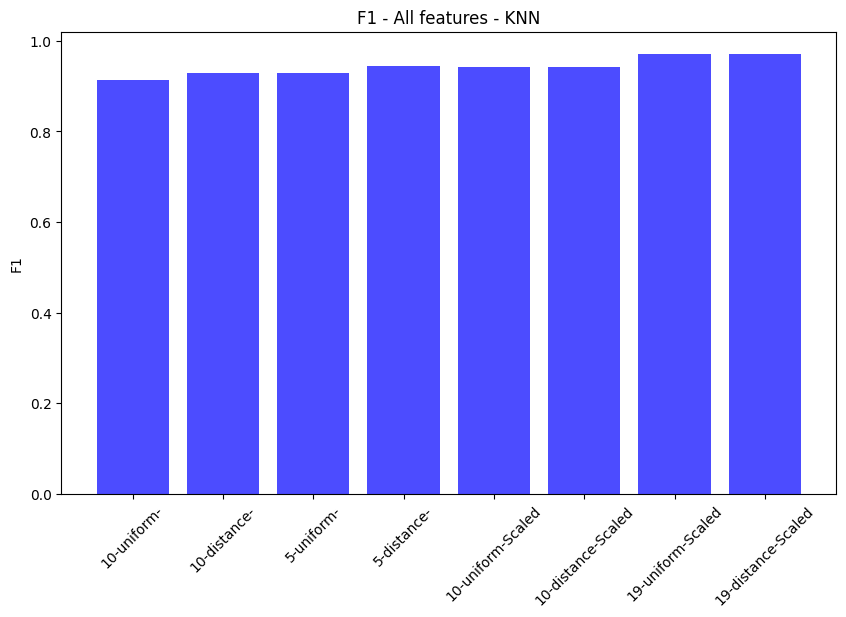

In [39]:
## Charts
# Crear un DataFrame con los datos
knn_all_features = {
    "scaling": ["", "", "", "", "Scaled", "Scaled", "Scaled", "Scaled"],
    "k": [10, 10, 5, 5, 10, 10, 19, 19],
    "weights": ["uniform", "distance", "uniform", "distance", "uniform", "distance", "uniform", "distance"],
    "Accuracy": [0.916, 0.93, 0.93, 0.94, 0.94, 0.94, 0.972, 0.972],
    "Precision": [0.94, 0.95, 0.94, 0.95, 0.96, 0.96, 0.98, 0.98],
    "Recall": [0.90, 0.92, 0.92, 0.94, 0.93, 0.93, 0.97, 0.97],
    "F1": [0.914, 0.929, 0.929, 0.944, 0.943, 0.943, 0.972, 0.972]
}
df = pd.DataFrame(knn_all_features)

plt.figure(figsize=(10, 6))
for i in range(len(df)):
    plt.bar(i, df["F1"][i], color='blue', alpha=0.7)
plt.xticks(range(len(df)), df["k"].astype(str) + "-" + df["weights"] + "-" + df["scaling"].astype(str), rotation=45)
plt.ylabel('F1')
plt.title('F1 - All features - KNN')
plt.show()

## Neural Networks

In [122]:
def test_configurations_nn (training_attributes, validation_data, scaling = False):
    # Define the configurations
    hidden_layers = [(5, 3)]
    activations = ['relu', 'identity', 'logistic', 'tanh']
    solvers = ['adam', 'lbfgs', 'sgd']

    # Initialize a list to store the results
    results = []

    # Loop over all configurations
    for hl in hidden_layers:
        for activation in activations:
            for solver in solvers:
                # Initialize the MLP model
                neural_network_model = MLPClassifier(hidden_layer_sizes=hl,
                                                    max_iter=1000, 
                                                    activation=activation,
                                                    solver=solver,
                                                    random_state=42)

                # Train and evaluate the model
                metrics = train_and_evaluate(neural_network_model, training_attributes, y_train, validation_data, y_test)

                # Append the results to the list
                results.append({
                    "scaling": scaling,
                    "hidden_layers": hl,
                    "activation": activation,
                    "solver": solver,
                    "Accuracy": metrics["accuracy"],
                    "Precision": metrics["precision"],
                    "Recall": metrics["recall"],
                    "F1": metrics["f1_score"]
                })

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)

    # Print the DataFrame
    # print(results_df)


    # Convert the DataFrame to a Markdown table
    markdown_table = results_df.to_markdown(index=False)

    # Print the Markdown table
    print(markdown_table)

### Test 1
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: No
- `activation`: relu
- `Features`: All

In [123]:
test_configurations_nn(X_train, X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

| scaling   | hidden_layers   | activation   | solver   |   Accuracy |   Precision |   Recall |       F1 |
|:----------|:----------------|:-------------|:---------|-----------:|------------:|---------:|---------:|
| False     | (5, 3)          | relu         | adam     |   0.819444 |    0.860477 | 0.788095 | 0.809631 |
| False     | (5, 3)          | relu         | lbfgs    |   0.583333 |    0.291667 | 0.5      | 0.429825 |
| False     | (5, 3)          | relu         | sgd      |   0.583333 |    0.291667 | 0.5      | 0.429825 |
| False     | (5, 3)          | identity     | adam     |   0.819444 |    0.860477 | 0.788095 | 0.809631 |
| False     | (5, 3)          | identity     | lbfgs    |   0.583333 |    0.291667 | 0.5      | 0.429825 |
| False     | (5, 3)          | identity     | sgd      |   0.916667 |    0.926421 | 0.904762 | 0.915584 |
| False     | (5, 3)          | logistic     | adam     |   0.861111 |    0.903846 | 0.833333 | 0.85461  |
| False     | (5, 3)          | logis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

### Test 2
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: Yes
- `activation`: relu
- `Features`: All

In [99]:
training_attributes = X_train_scaled
validation_data = X_test_scaled


test_configurations_nn(training_attributes, validation_data, scaling = True)

[0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0]


### Test 3
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: No
- `activation`: relu
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [42]:
training_attributes = X_train_important_attributes_5p
validation_data = X_test_important_attributes_5p
activation_function = 'logistic'
solver = 'sgd'

hidden_layers_structure = (5, 3)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation=activation_function,
                                     solver=solver,
                                     random_state=42)

# Training the model
train_and_evaluate(neural_network_model, training_attributes, y_train, validation_data, y_test)





{'accuracy': 0.9444444444444444,
 'precision': 0.948051948051948,
 'recall': 0.9380952380952381,
 'f1_score': 0.9441325848703556}

### Test 4
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: Yes
- `activation`: relu
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean
    - radiusWorst
    - concavityMean
    - perimeterMean
    - perimeterWorst
    - radiusMean
    - areaMean

In [43]:
training_attributes = X_train_scaled_important_attributes_5p
validation_data = X_test_scaled_important_attributes_5p
activation_function = 'logistic'
solver = 'sgd'

hidden_layers_structure = (5, 3)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation=activation_function,
                                     solver=solver,
                                     random_state=42)

# Training the model
train_and_evaluate(neural_network_model, training_attributes, y_train, validation_data, y_test)




{'accuracy': 0.9722222222222222,
 'precision': 0.9772727272727273,
 'recall': 0.9666666666666667,
 'f1_score': 0.9720662924351777}

### Test 5
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: No
- `activation`: relu
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [44]:
training_attributes = X_train_important_attributes_10p
validation_data = X_test_important_attributes_10p
activation_function = 'logistic'
solver = 'sgd'

hidden_layers_structure = (5, 3)

neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation=activation_function,
                                     solver=solver,
                                     random_state=42)

# Training the model
# Training the model
train_and_evaluate(neural_network_model, training_attributes, y_train, validation_data, y_test)





{'accuracy': 0.8888888888888888,
 'precision': 0.8963210702341138,
 'recall': 0.8761904761904762,
 'f1_score': 0.8874458874458875}

### Test 6
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: Yes
- `activation`: relu
- `Features`: 
    - concavePointsWorst
    - areaWorst
    - concavePointsMean

In [45]:
training_attributes = X_train_scaled_important_attributes_10p
validation_data = X_test_scaled_important_attributes_10p

hidden_layers_structure = (5, 3)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation='relu',
                                     solver='adam',
                                     random_state=42)

# Training the model
train_and_evaluate(neural_network_model, training_attributes, y_train, validation_data, y_test)



{'accuracy': 0.9444444444444444,
 'precision': 0.948051948051948,
 'recall': 0.9380952380952381,
 'f1_score': 0.9441325848703556}

### Test 7
- `Structure`: 2 hidden layer with 3 neurons and 5 neurons
- `Data normalization`: No
- `activation`: relu
- `solver`: sgd
- `Features`: All

In [46]:
training_attributes = X_train
validation_data = X_test
activation_function = 'identity'
solver = 'lbfgs'

hidden_layers_structure = (10, 4, 5, 3, 5)

# Initializing the MLP model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layers_structure,
                                     max_iter=100, 
                                     activation=activation_function,
                                     solver=solver,
                                     random_state=42)

# Training the model
train_and_evaluate(neural_network_model, training_attributes, y_train, validation_data, y_test)


{'accuracy': 0.9444444444444444,
 'precision': 0.948051948051948,
 'recall': 0.9380952380952381,
 'f1_score': 0.9441325848703556}